In [1]:
from matplotlib import pyplot as plt

from helpers import arr_helpers, misc_helpers
from helpers.io_helper import IO_Helper


RUN_SIZE = 'full'
SMALL_IO_HELPER = False
BIG_ARRAYS_FOLDER = 'arrays'


print('loading data')
X_train, y_train, X_val, y_val, X_test, y_test, X, y, scaler_y = misc_helpers._quick_load_data(RUN_SIZE)

if SMALL_IO_HELPER:
    io_helper = IO_Helper(arrays_folder='arrays_small', models_folder='models_small')
else:
    io_helper = IO_Helper(arrays_folder=BIG_ARRAYS_FOLDER)

y_train, y_test, y_val, y = misc_helpers.make_arrs_1d(y_train, y_test, y_val, y)
print('done')

C:\Users\Mischa\Desktop\Uni\Master\MA\code\my_code\helpers\misc_helpers.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr.drop(columns=ts_cols, inplace=True)  # todo: works bc no ts cols present?
C:\Users\Mischa\Desktop\Uni\Master\MA\code\my_code\helpers\misc_helpers.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr.drop(columns=ts_cols, inplace=True)  # todo: works bc no ts cols present?
C:\Users\Mischa\Desktop\Uni\Master\MA\code\my_code\helpers\misc_helpers.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

In [7]:
import pandas as pd

df = pd.read_pickle('./data/data.pkl')
df

,ts_pred,load_to_pred,cat_is_sunday_or_holiday,cat_is_saturday_and_not_holiday,cat_is_workday,cat_is_heating_period,load_last_year,load_last_week,load_yesterday,load_last_hour,spline_peaking_at_21,spline_peaking_at_0,spline_peaking_at_3,spline_peaking_at_6,spline_peaking_at_9,spline_peaking_at_12,spline_peaking_at_15,spline_peaking_at_18
0,2016-01-01 00:00:00+01:00,11004.75,True,False,False,True,11210.00,10178.50,11534.25,11505.00,0.166667,0.666667,0.166667,0.000000,0.0,0.0,0.0,0.000000
1,2016-01-01 00:15:00+01:00,10956.75,True,False,False,True,11118.75,9967.75,11298.00,11351.50,0.128376,0.660012,0.211516,0.000096,0.0,0.0,0.0,0.000000
2,2016-01-01 00:30:00+01:00,10913.50,True,False,False,True,11144.75,9769.50,11121.75,11250.25,0.096451,0.641204,0.261574,0.000772,0.0,0.0,0.0,0.000000
3,2016-01-01 00:45:00+01:00,10856.75,True,False,False,True,11126.75,9563.50,10917.25,11175.25,0.070312,0.611979,0.315104,0.002604,0.0,0.0,0.0,0.000000
4,2016-01-01 01:00:00+01:00,10695.50,True,False,False,True,11009.50,9419.25,10762.50,11004.75,0.049383,0.574074,0.370370,0.006173,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280507,2023-12-31 22:45:00+01:00,10782.00,True,False,False,True,10457.75,11116.00,10752.00,11134.50,0.425637,0.529225,0.033083,0.000000,0.0,0.0,0.0,0.012056
280508,2023-12-31 23:00:00+01:00,10753.75,True,False,False,True,10331.25,11023.50,10487.25,11191.50,0.370370,0.574074,0.049383,0.000000,0.0,0.0,0.0,0.006173
280509,2023-12-31 23:15:00+01:00,10606.75,True,False,False,True,10339.50,10856.25,10287.75,11117.25,0.315104,0.611979,0.070312,0.000000,0.0,0.0,0.0,0.002604
280510,2023-12-31 23:30:00+01:00,10495.75,True,False,False,True,10220.75,10688.25,10163.50,11008.50,0.261574,0.641204,0.096451,0.000000,0.0,0.0,0.0,0.000772


In [13]:
if not 'year' in df.columns:
    years_col = df.ts_pred.map(lambda ts: ts.year)
    df.insert(1, 'year', years_col)
df

,ts_pred,year,load_to_pred,cat_is_sunday_or_holiday,cat_is_saturday_and_not_holiday,cat_is_workday,cat_is_heating_period,load_last_year,load_last_week,load_yesterday,load_last_hour,spline_peaking_at_21,spline_peaking_at_0,spline_peaking_at_3,spline_peaking_at_6,spline_peaking_at_9,spline_peaking_at_12,spline_peaking_at_15,spline_peaking_at_18
0,2016-01-01 00:00:00+01:00,2016,11004.75,True,False,False,True,11210.00,10178.50,11534.25,11505.00,0.166667,0.666667,0.166667,0.000000,0.0,0.0,0.0,0.000000
1,2016-01-01 00:15:00+01:00,2016,10956.75,True,False,False,True,11118.75,9967.75,11298.00,11351.50,0.128376,0.660012,0.211516,0.000096,0.0,0.0,0.0,0.000000
2,2016-01-01 00:30:00+01:00,2016,10913.50,True,False,False,True,11144.75,9769.50,11121.75,11250.25,0.096451,0.641204,0.261574,0.000772,0.0,0.0,0.0,0.000000
3,2016-01-01 00:45:00+01:00,2016,10856.75,True,False,False,True,11126.75,9563.50,10917.25,11175.25,0.070312,0.611979,0.315104,0.002604,0.0,0.0,0.0,0.000000
4,2016-01-01 01:00:00+01:00,2016,10695.50,True,False,False,True,11009.50,9419.25,10762.50,11004.75,0.049383,0.574074,0.370370,0.006173,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280507,2023-12-31 22:45:00+01:00,2023,10782.00,True,False,False,True,10457.75,11116.00,10752.00,11134.50,0.425637,0.529225,0.033083,0.000000,0.0,0.0,0.0,0.012056
280508,2023-12-31 23:00:00+01:00,2023,10753.75,True,False,False,True,10331.25,11023.50,10487.25,11191.50,0.370370,0.574074,0.049383,0.000000,0.0,0.0,0.0,0.006173
280509,2023-12-31 23:15:00+01:00,2023,10606.75,True,False,False,True,10339.50,10856.25,10287.75,11117.25,0.315104,0.611979,0.070312,0.000000,0.0,0.0,0.0,0.002604
280510,2023-12-31 23:30:00+01:00,2023,10495.75,True,False,False,True,10220.75,10688.25,10163.50,11008.50,0.261574,0.641204,0.096451,0.000000,0.0,0.0,0.0,0.000772


In [105]:
df15_18 = pd.read_pickle('./data/data_2015_2018.pkl')
df15_18

,ts_pred,load_to_pred,cat_is_sunday_or_holiday,cat_is_saturday_and_not_holiday,cat_is_workday,cat_is_heating_period,load_last_year,load_last_week,load_yesterday,load_last_hour,spline_peaking_at_21,spline_peaking_at_0,spline_peaking_at_3,spline_peaking_at_6,spline_peaking_at_9,spline_peaking_at_12,spline_peaking_at_15,spline_peaking_at_18
0,2016-01-01 00:00:00+01:00,11004.75,True,False,False,True,11210.00,10178.50,11534.25,11505.00,0.166667,0.666667,0.166667,0.000000,0.0,0.0,0.0,0.000000
1,2016-01-01 00:15:00+01:00,10956.75,True,False,False,True,11118.75,9967.75,11298.00,11351.50,0.128376,0.660012,0.211516,0.000096,0.0,0.0,0.0,0.000000
2,2016-01-01 00:30:00+01:00,10913.50,True,False,False,True,11144.75,9769.50,11121.75,11250.25,0.096451,0.641204,0.261574,0.000772,0.0,0.0,0.0,0.000000
3,2016-01-01 00:45:00+01:00,10856.75,True,False,False,True,11126.75,9563.50,10917.25,11175.25,0.070312,0.611979,0.315104,0.002604,0.0,0.0,0.0,0.000000
4,2016-01-01 01:00:00+01:00,10695.50,True,False,False,True,11009.50,9419.25,10762.50,11004.75,0.049383,0.574074,0.370370,0.006173,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105211,2018-12-31 22:45:00+01:00,11977.50,False,False,True,True,11448.25,11835.50,11826.25,12174.50,0.425637,0.529225,0.033083,0.000000,0.0,0.0,0.0,0.012056
105212,2018-12-31 23:00:00+01:00,11804.00,False,False,True,True,11504.75,11611.50,11676.00,12306.00,0.370370,0.574074,0.049383,0.000000,0.0,0.0,0.0,0.006173
105213,2018-12-31 23:15:00+01:00,11718.00,False,False,True,True,11366.50,11476.50,11469.50,12169.25,0.315104,0.611979,0.070312,0.000000,0.0,0.0,0.0,0.002604
105214,2018-12-31 23:30:00+01:00,11559.75,False,False,True,True,11177.00,11350.00,11266.25,12070.00,0.261574,0.641204,0.096451,0.000000,0.0,0.0,0.0,0.000772


In [131]:
years = range(df.year.min(), df.year.max()+1)
data_by_year = {min(years)-1: df[df.year == min(years)].load_last_year}  # get earliest data from last_year col
data_by_year.update({
    year: df[df.year == year].load_to_pred
    for year in years
})
data_by_year

{2015: 0        11210.00
 1        11118.75
 2        11144.75
 3        11126.75
 4        11009.50
            ...   
 35131    11603.75
 35132    11505.00
 35133    11351.50
 35134    11250.25
 35135    11175.25
 Name: load_last_year, Length: 35136, dtype: float64,
 2016: 0        11004.75
 1        10956.75
 2        10913.50
 3        10856.75
 4        10695.50
            ...   
 35131    12377.25
 35132    12349.00
 35133    12224.50
 35134    12131.00
 35135    12012.25
 Name: load_to_pred, Length: 35136, dtype: float64,
 2017: 35136    11843.25
 35137    11799.00
 35138    11789.00
 35139    11701.25
 35140    11637.75
            ...   
 70171    11448.25
 70172    11504.75
 70173    11366.50
 70174    11177.00
 70175    11030.50
 Name: load_to_pred, Length: 35040, dtype: float64,
 2018: 70176     11510.50
 70177     11381.25
 70178     11293.25
 70179     11248.25
 70180     11173.75
             ...   
 105211    11977.50
 105212    11804.00
 105213    11718.00
 105214    

0 2015
1 2016
2 2017
3 2018
4 2019
5 2020
6 2021
7 2022
8 2023
saving
showing


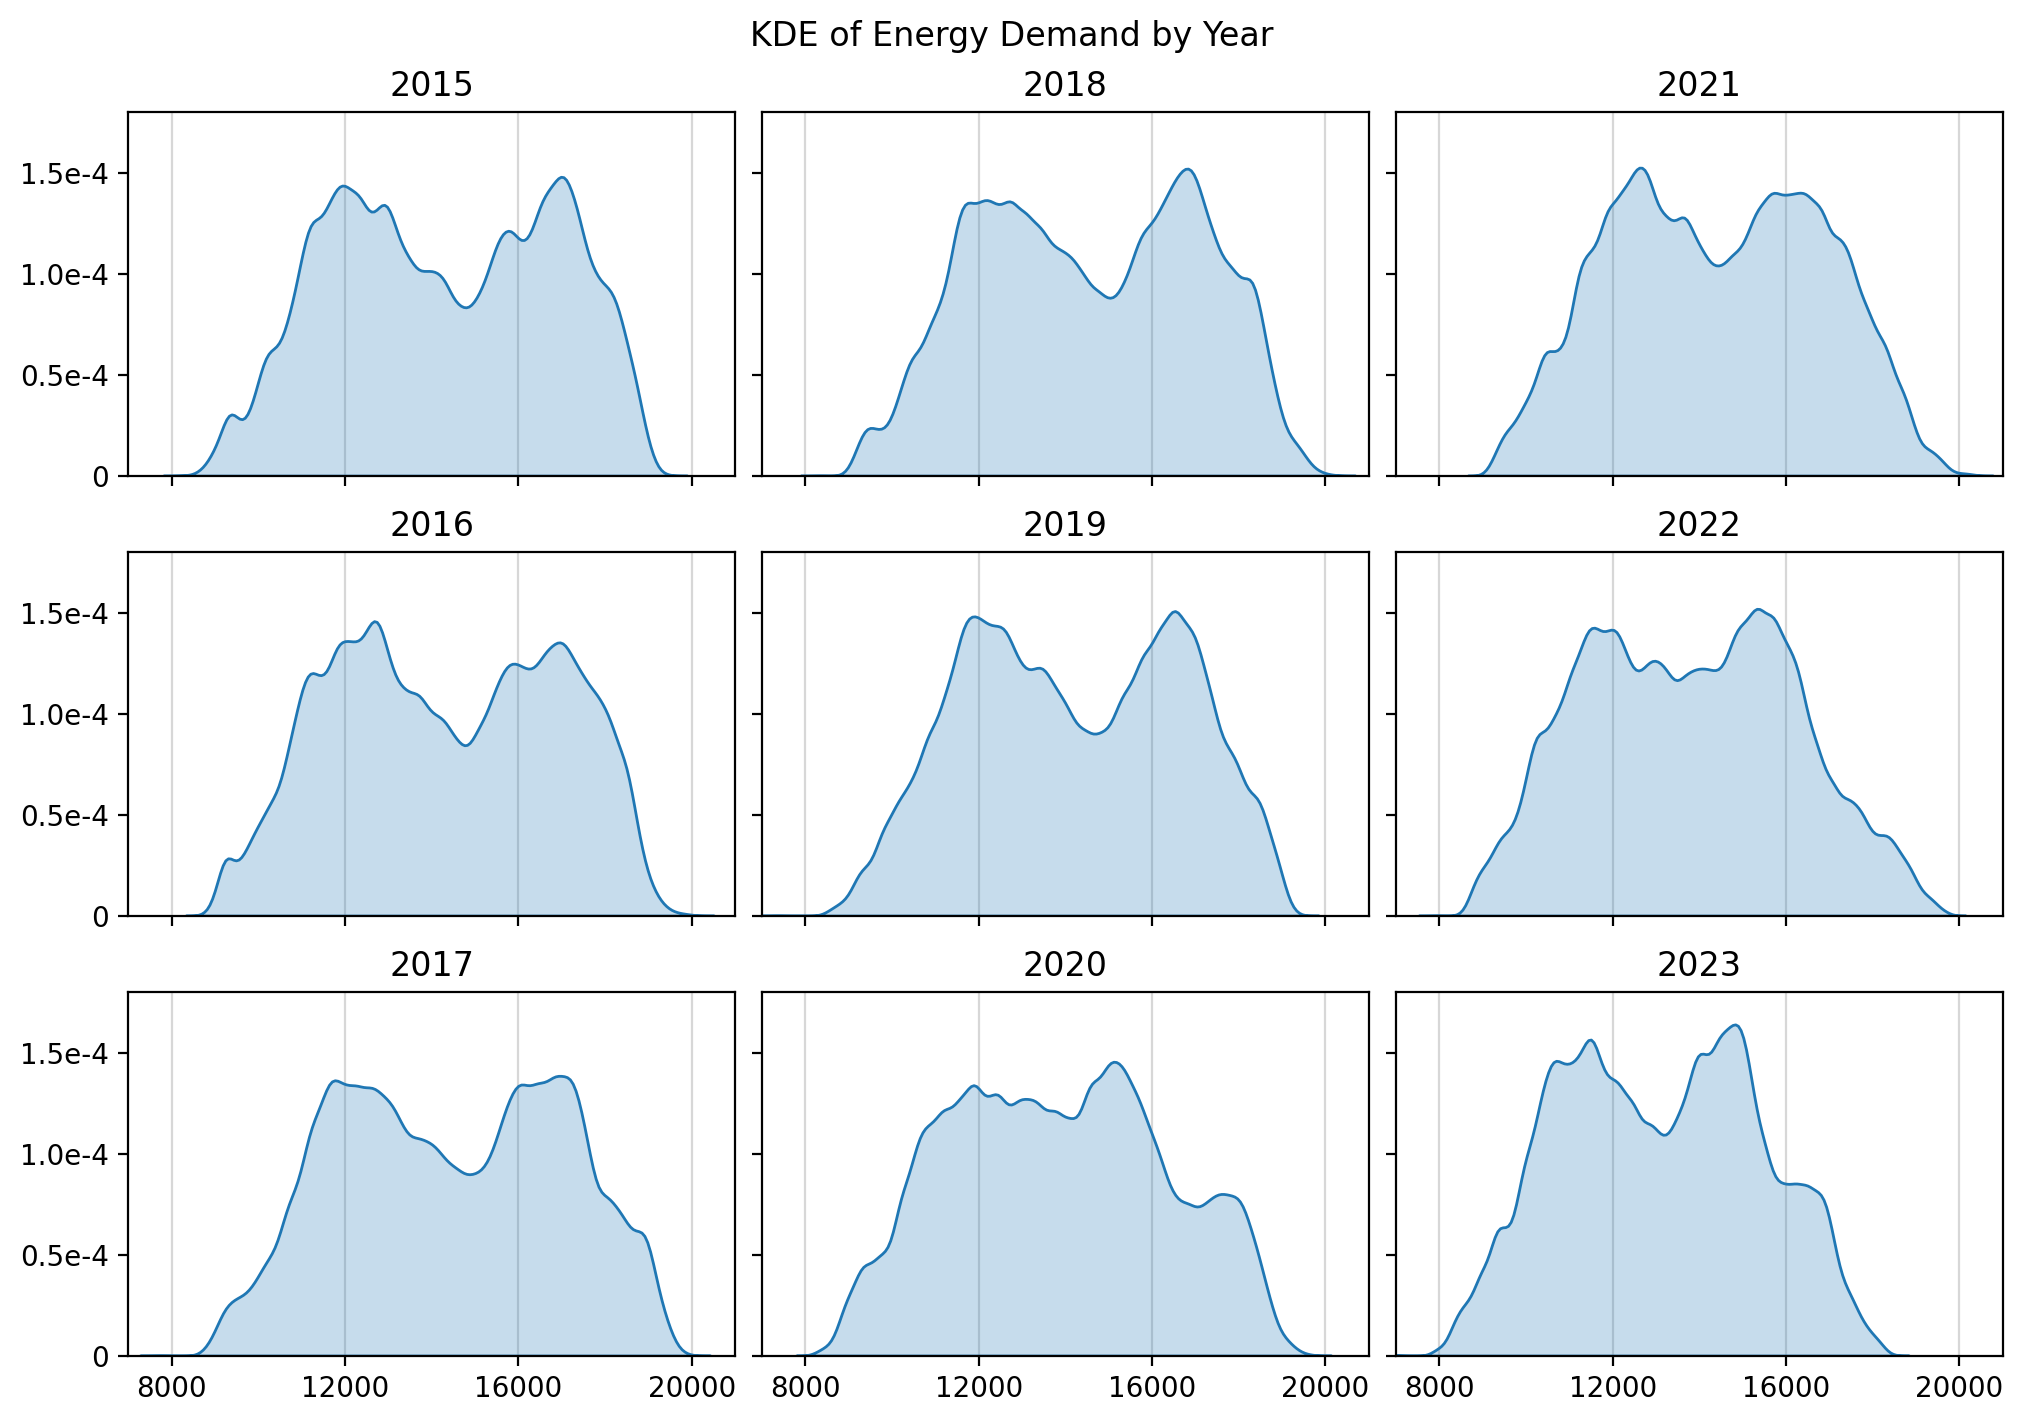

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

BINS = 30
SAVEFIG = True
FILEPATH = './comparison_storage/plots/data_distr.pdf'
DPI = 200

YMAX = 1.8e-4
y_ticks = [0, 0.5e-4, 1.0e-4, 1.5e-4]
y_ticks_labels = ['0', '0.5e-4', '1.0e-4', '1.5e-4']
x_ticks = np.linspace(8000, 20000, 4).astype(int)  #[8000, 12000, 16000, 20000]
x_ticks_labels = x_ticks

fig, axs = plt.subplots(3, 3, figsize=(10, 7), layout='constrained', dpi=DPI)
for i, (ax, (year, year_data)) in enumerate(zip(axs.transpose().ravel(), data_by_year.items())):
    print(i, year)
    # if year != 2017:
    #     continue
    # ax.hist(year_data, bins=BINS)
    # sns.histplot(year_data, bins=BINS, kde=True, ax=ax)
    sns.kdeplot(year_data, ax=ax, fill=True, bw_adjust=0.5)
    ax.set_xlim(7000, 21000)
    ax.set_ylim(0, YMAX)
    # only add ticks to the outside
    if year in [2017, 2020, 2023]:
        ax.set_xticks(x_ticks, x_ticks_labels)
    else:
        ax.set_xticks(x_ticks, [''] * len(x_ticks))
    if 2015 <= year <= 2017:
        ax.set_yticks(y_ticks, y_ticks_labels) 
    else:
        ax.set_yticks(y_ticks, [''] * len(y_ticks))
    ax.grid(axis='x', alpha=0.5)
    ax.set_axisbelow(True)
    ax.set_title(year)
    ax.set_xlabel('')
    ax.set_ylabel('')
fig.suptitle('KDE of Energy Demand by Year')
if SAVEFIG:
    print('saving')
    plt.savefig(FILEPATH)
print('showing')

plotting
saving
showing


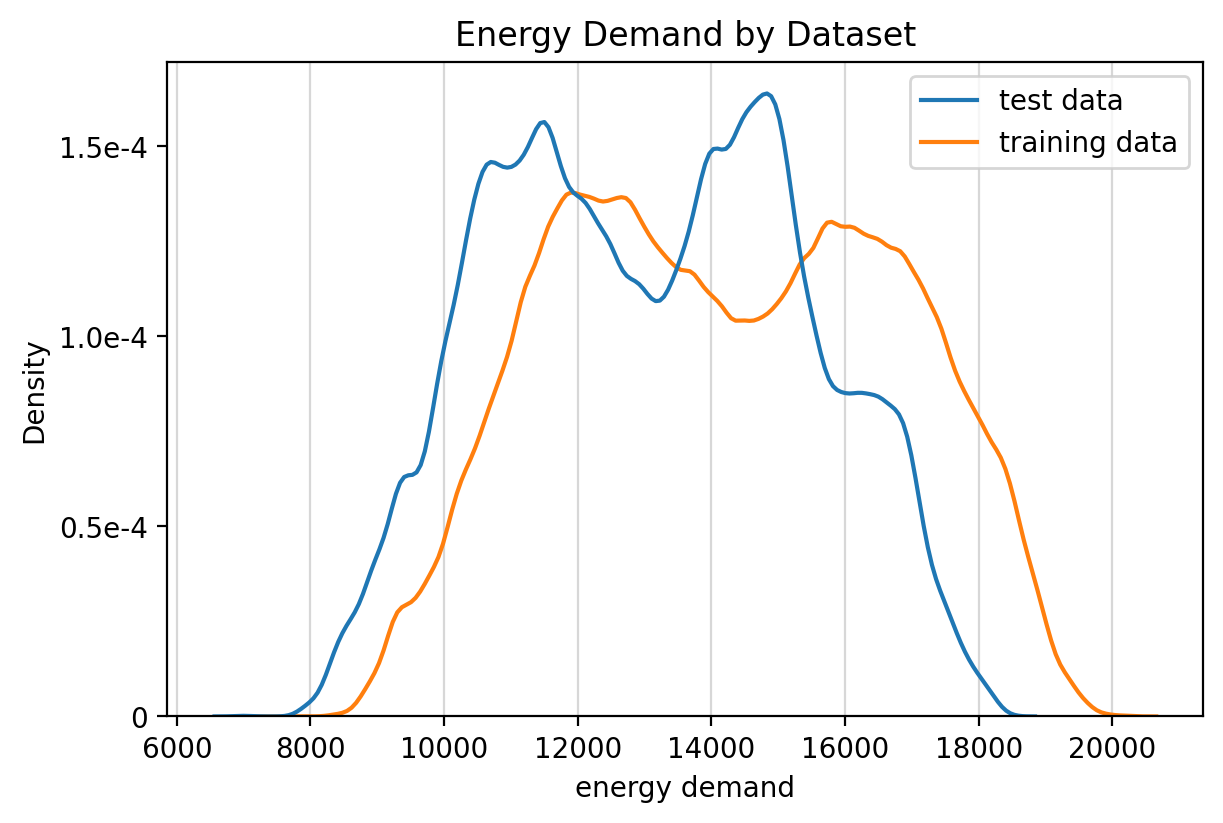

In [184]:
SAVEFIG = True
FILEPATH = './comparison_storage/plots/data_distr_train_test.pdf'
DPI = 200

# YMAX = 1.8e-4
y_ticks = [0, 0.5e-4, 1.0e-4, 1.5e-4]
y_ticks_labels = ['0', '0.5e-4', '1.0e-4', '1.5e-4']
# x_ticks = np.linspace(8000, 20000, 4).astype(int)  #[8000, 12000, 16000, 20000]
# x_ticks_labels = x_ticks

train_test_data = {
    'test data': data_by_year[2023],
    'training data': df[df.year < 2023].load_to_pred,
}

print('plotting')
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained', dpi=DPI)
sns.kdeplot(train_test_data, fill=False, bw_adjust=0.5, common_norm=False, ax=ax)
# ax.set_xlim(7000, 21000)
# ax.set_ylim(0, YMAX)
# ax.set_xticks(x_ticks, x_ticks_labels)
ax.grid(axis='x', alpha=0.5)
ax.set_axisbelow(True)
ax.set_yticks(y_ticks, y_ticks_labels)
ax.set_xlabel('energy demand')
ax.set_title('Energy Demand by Dataset')
if SAVEFIG:
    print('saving')
    plt.savefig(FILEPATH)
print('showing')

saving
showing


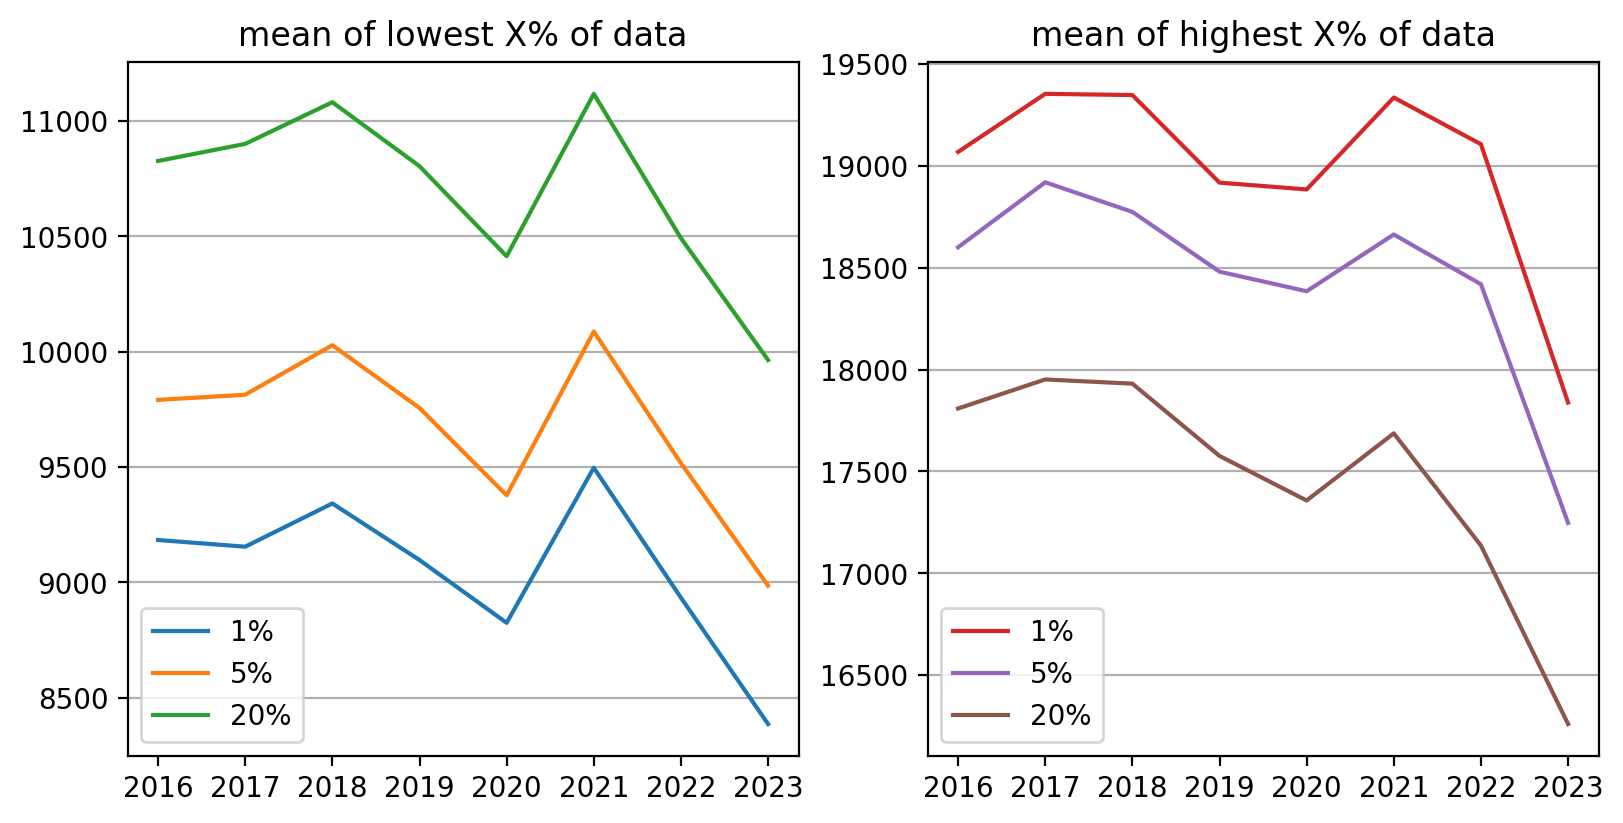

In [100]:
import numpy as np
from functools import partial


def get_extreme_mean(extreme_level, data, lowest=True):
    sorted_data = sorted(data, reverse=not lowest)
    cutoff = round(len(sorted_data) * extreme_level)
    partial_data = sorted_data[:cutoff]
    return np.mean(partial_data)


SAVEFIG = True
FILEPATH = './comparison_storage/plots/data_extremes.pdf'
DPI = 200
EXTREME_LEVELS = {
    'low': [0.01, 0.05, 0.20],
    'high': [0.01, 0.05, 0.20],
}
METRICS = {
    # 'min': np.min,
    # 'mean': np.mean,
    # 'max': np.max,
}


COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_iter = iter(COLORS)

fig, axs = plt.subplots(1, 2, figsize=(8, 4), layout='constrained', dpi=DPI)
for ax, (level_type, extreme_levels_list) in zip(axs, EXTREME_LEVELS.items()):
    metrics = METRICS.copy()
    for extreme_level in extreme_levels_list:
        key = f'{round(extreme_level * 100)}%'
        metrics[key] = partial(get_extreme_mean, extreme_level, lowest=(level_type=='low'))
    
    metric_year_values = {
        metric: {year: metric_func(year_data)
                 for year, year_data in data_by_year.items()}
        for metric, metric_func in metrics.items()
    }
    
    for metric, years_dict in metric_year_values.items():
        ax.plot(years_dict.keys(), years_dict.values(), label=metric, color=next(color_iter))
    ax.grid(axis='y')
    ax.set_title(f'mean of {level_type}est X% of data')
    ax.legend()

if SAVEFIG:
    print('saving')
    plt.savefig(FILEPATH)
print('showing')